<h1> Partitionieredes Clustering 1 </h1>
<h2>Vorbereitung der Datensätze</h2>

Bevor mit dem partitionierenden Clustering begonnen werden kann, muss eine <b>Anzahl von Clustern festgelegt</b> werden.<br>
In unserem Fall sind das 4 Stück.<br>
Zuerst legen wir zufällig Datensätze an mit der make_blobs Methode.<br>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Bedeutung</th>
    <th>Wert</th>
  </tr>
  <tr>
    <td>n_samples</td>
    <td>Wie viele Datensätze angelegt werden sollen?</td>
    <td>1000</td>
  </tr>
  <tr>
    <td>n_features</td>
    <td>Wie viele Merkmale werden angelegt?</td>
    <td>5</td>
  </tr>
  <tr>
    <td>centers</td>
    <td>Wie viele Zentren sollen gebildet werden</td>
    <td>4</td>
  </tr>
  <tr>
    <td>cluster_std</td>
    <td>Wie groß ist die Standabweichung?</td>
    <td>3</td>
  </tr>
  <tr>
    <td>random_state</td>
    <td>Dadurch bleibt die Rückgabe der Methode konstant/gleich</td>
    <td>0</td>
  </tr>
</table>

<h3>Situation:</h3><br>
Angenommen die 1000 Datensätze stellen 1000 Kunden einer Bank dar, die anhand der 5 Merkmale in 4 Bonitätsklassen eingeteilt werden. 

Die <b>Dokumentation</b> zu der make_blobs Methode kann hier aufgerufen werden <a>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html</a>

In [1]:
from sklearn.datasets import make_blobs
import sklearn
from sklearn.cluster import KMeans as KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X , y= make_blobs(n_samples = 1000, n_features=5, centers=4, cluster_std=3, random_state=0)

print(X)
print("------------------------------------------------------------------------------")
print(y)

[[  4.2900055    1.2593096    0.24827196   3.66188885  -0.14446058]
 [  1.681067    -2.45863333   2.34537436   7.18574985  -1.59087155]
 [  4.59321328  -0.93449785   5.19647879  11.32842795 -16.72811976]
 ...
 [ -7.93096819 -14.08186468   5.21229594  11.04946131   5.03603886]
 [  3.09353384   6.03137763   0.35870238  11.23490864 -11.08959196]
 [-10.66713243 -12.36153503  11.97456592   5.64940373   9.05913451]]
------------------------------------------------------------------------------
[0 1 2 0 0 3 2 0 3 2 3 3 1 1 3 0 1 2 1 2 0 0 2 1 3 0 3 3 3 1 2 3 0 1 3 2 3
 2 2 3 3 3 3 2 1 3 1 3 1 2 1 2 0 2 2 2 0 3 0 3 2 3 3 1 2 1 0 1 2 2 3 2 0 2
 0 3 3 1 2 0 2 0 3 0 1 0 1 1 2 3 0 3 1 0 1 0 1 2 0 3 2 1 2 3 2 3 1 1 2 2 3
 1 2 2 2 1 2 3 1 3 2 1 3 0 2 3 0 0 0 0 0 0 3 3 3 3 1 3 1 3 3 1 2 1 0 3 1 0
 3 0 3 2 0 2 2 0 2 3 0 3 1 2 1 3 2 2 2 0 3 0 2 2 3 1 1 3 1 3 1 3 2 0 2 0 2
 2 2 1 1 1 3 0 1 1 1 3 3 2 2 1 1 3 3 1 1 1 2 3 0 3 0 1 3 0 3 2 0 2 1 2 0 0
 0 1 0 1 0 3 1 0 3 3 2 1 2 2 2 0 3 2 1 2 1 1 0 1 3 1 2 0 

<h3>Erläuterung des Rückgabewertes der Methode</h3>
X: Ein Zweidimendionales ndArray, welches die erzeugten Datensätze mit ihren Merkmalen beinhaltet. <br>
Y: ndArray mit Ganzzahlen, welche die Zugehörigkeit des einzelnen Datensatzes zum jeweiligen Cluster beeinhaltet.

<h2> Visualisierung der Abhängigkeiten mit seaborn.pairplot </h2> <br>
Damit wir die Daten mit der pariplot Methode darstellen können, müssen diese in ein DataFrame Objekt umgewandelt werden.<br>
Ein DataFrame ist eine zweidimensionale, tabellarische Struktur mit beschrifteten Achsen (Zeilen und Spalten). 
Die einzelnen Zeilen stellen hier die jeweiligen Datensätze da, während die Spalten die jeweiligen Merkmale des Datensatzes darstellen.
Standardmäßig sind die Zeilen und Spalten mit 0,1,2,3,...,n beschriftet. Im Folgenden werden die Spaltenbeschriftungen zur Verdeutlichung der Situation entsprechend angepasst.

In [2]:
df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Disporahmen', 'Kontostand', 'Zahlungsverpflichtungen']) 
df['Bonitätsklasse'] = y
print(df)

        Gehalt      Alter  Disporahmen  Kontostand  Zahlungsverpflichtungen  \
0     4.290005   1.259310     0.248272    3.661889                -0.144461   
1     1.681067  -2.458633     2.345374    7.185750                -1.590872   
2     4.593213  -0.934498     5.196479   11.328428               -16.728120   
3    -0.061675   2.912999     3.499712   -3.724727                -1.337118   
4     2.348517   1.409951    -0.292620    0.566496                -4.690789   
..         ...        ...          ...         ...                      ...   
995  -0.273205  -2.541545     9.553714   11.305926                 1.590382   
996   0.605529  -2.690792     9.946217   12.060691                -1.217652   
997  -7.930968 -14.081865     5.212296   11.049461                 5.036039   
998   3.093534   6.031378     0.358702   11.234909               -11.089592   
999 -10.667132 -12.361535    11.974566    5.649404                 9.059135   

     Bonitätsklasse  
0                 0  
1      

Mit der pairplot Methode visualisieren wir die Abhängigkeiten zwischen den fünf Merkmalen.<br>
Die Darstellung mit der scatterplot Methode ist das durch die Menge an Abhängigkeiten nicht möglich. <br>
Mit dem Paramerter hue werden die Zielklassen eingefärbt.

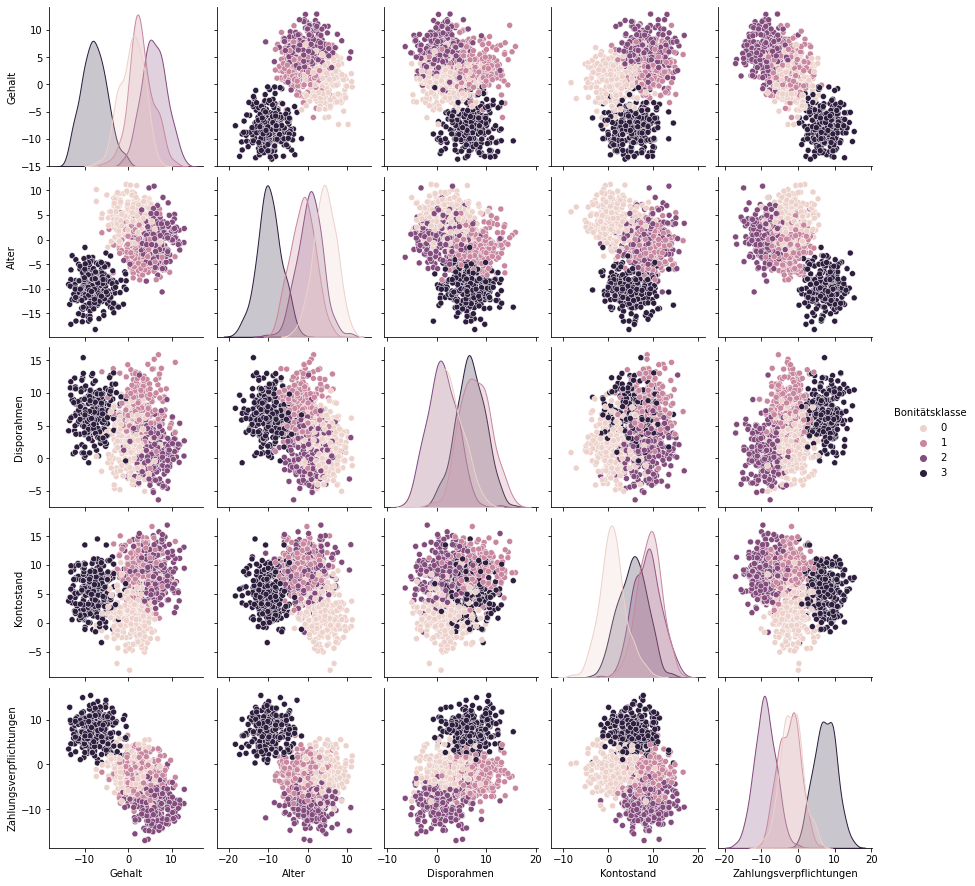

In [3]:
sns.pairplot(df, hue = 'Bonitätsklasse')

Zur Visualisierung der Verteilung von Datensätzen anhand ihrer Merkmale können verschiedene Methoden angewandt werden. Im zweidimensionalen Raum ist das Streudiagramm (Scatterplot) verbreitet, bei dem die Datensätze als Punkte in einem Koordinatensystem veranschaulicht werden. Dies wird bei fünf Dimensionen recht unübersichtlich, da die vierte und fünfte Dimension über Größe und Farbe der Punkte simuliert werden müssen. 
Die pairplot-Methode, die im Folgendem verwendet wurde, stellt eine mögliche Alternative dar. Dabei werden immer zwei Merkmale (in Form von Streudiagrammen) zueinander in Beziehung gesetzt. Dies erfolgt dann für jede mögliche Kombination, sodass bei fünf Merkmalen eine 5x5 Matrix entsteht.

<h2> Partionierendes Clustern </h2><br>

<ol>
    <li>
        Zuerst werden 4 beliebige Werte/Datensätze ausgewählt denen die Datensätze nach Nähe zugeordnet werden. 
    </li>
    <li>
Infolgedessen werden die Centroide neu berechnet.
    </li>
    <li>
Je nach Distanz werden die Datensätze neu zugeordnet.
    </li>
    <li>
Dieser Vorgang wiederholt sich solang, bis ein Endkriterium erreicht ist. </li>
</ol>  

Ein Endkriterium kann zum Beispiel..... sein(j)

Der Methode KMeans wurden hier zwei Parameter übergeben: Die Anzahl der Cluster und ein Integer für random_state damit bei wiederholtem Methodenaufruf die selben Zentroide gewählt werden. Mit den Methodenaufruf fit() übergeben wir als Parameter das Data Set welches geclustert werden soll. <br/>
Die Variable "kmeans" stellt das Modell dar, welches durch das Data Set trainiert werden soll.
Mit kmeans.predict() kann dann trainierte Model an einem Datenbestand angewendet werden.
https://stackoverflow.com/questions/54511542/what-is-the-use-of-predict-method-in-kmeans-implementation-of-scikit-learn

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

y_kmeans=kmeans.predict(X)

sklearn.metrics.accuracy_score(y, y_kmeans)

0.252

<h3>Güte</h3>

Wir nutzen in der Methode accuracy_score die Parameter y_true, in unserem Fall y und y_pred, also die Vorrausgesagten Werte von y_kmeans. 
Die Methode berechnet die Genauigkeit mit der folgenden Formel:
 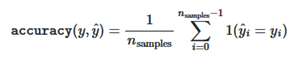
Eine vereinfachte Berechnung wäre, wenn die korrekten Vorhersagen durch alle Vorhersagen dividiert werden.
Je höher die Accuracy, desto besser. Insgesamt ist die Güte selbst ungenauer als die Konfusionsmatrix.
In unserem Fall haben wir eine Accuracy von 0,252 also 25,2%.


In [10]:
sklearn.metrics.confusion_matrix(y, y_kmeans)

array([[238,   0,   7,   5],
       [  4,   0, 232,  14],
       [  3,   0,  14, 233],
       [  0, 250,   0,   0]], dtype=int64)

<h2>Konfusionsmatrix</h2><br/>
Die Konfusionsmatrix wird nur benutzt, um zu klassifizieren, sie sagt keine numerischen Werte voraus. 

<h3>Beispiel:</h3><br/>
Schauen wir zuerst auf ein Beispiel einer 2x2 Konfusionsmatrix. 

 Wir sehen hier eine Matrix mit insgesamt 165 einsortierten Fällen. Nehmen wir einmal an es handelt sich um eine Angabe der Genauigkeit eines Testes, ob ein Mensch erkrankt ist oder nicht. In diesem Fall würde Ja für positiv getestet und Nein für negativ getestet stehen. Wir hätten mit unserem Test 110 als negativ eingestuft, obwohl 105 wirklich nicht erkrankt sind und wir haben 55 positiv getestet, obwohl 60 erkrankt sind. <br/>
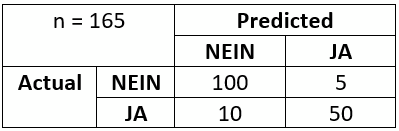<br/>
Daraus ergeben sich 100 die in Wirklichkeit und vom Test als negativ eingestuft wurden, diese werden true negatives genannt. Die 50 die richtig als positiv einsortiert wurden, werden true postives genannt. Die 5 falsch positiv getesteten werden false positives genannt oder auch Type 1 Error und die 10 die noch übrig bleiben false negatives oder Type 2 Error. Die true negatives und positives sollen maximiert und die false negatives und positves minimiert werden. Je nach Anwendungsbereich ist es wichtiger einen der beiden false Werte kleiner zu bekommen als den anderen. So ist es zum Beispiel schlimmer falsch negativ auf eine Krankheit getestet zu werden, gegen die es eine Behandlung gibt, als falsch positiv.<br/>
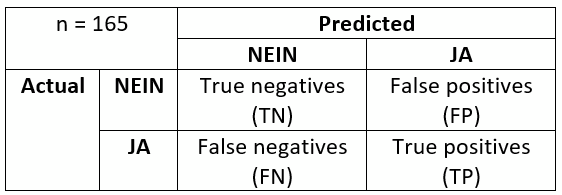<br/>
Aus diesen Matrizen lassen sich folgende Werte ableiten:
<ul>
    <li>Genauigkeit=(TP+TN)/n </li>
<li>Fehlerrate=(FP+FN)/n</li>
<li>Spezifität=TN/(TN+FP)</li>
<li>Präzision=TP/(TP+FP)</li>
<li>Sensitivität=TP/(TP+FN)</li>
<li>Prävalenz=(FN+TP)/n</li>
    </ul>
Bei größeren Matrizen werden zur Berechnung der Genauigkeit alle Werte in der Diagonalen miteinander addiert und durch die gesamte Anzahl geteilt.


<AxesSubplot:>

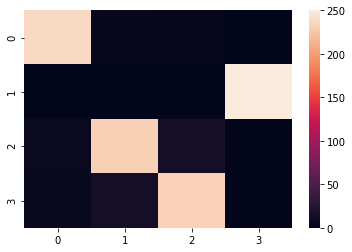

In [13]:
sns.heatmap(sklearn.metrics.confusion_matrix(y_kmeans, y))

Bei der heatmap Methode wird ein Parameter data benötigt, dieser ist in unserem Fall die Konfusionsmatrix. Außerdem kann mit dem Parameter annot die Beschriftung jedes Wertes mit in die entsprechende Zelle geschrieben werden. <br/>
Der Begriff der Heatmap kommt von den verwendeten Farben, die wie bei einer Wärmebildkamera sind. Rot steht für eine hohen positiven wert, orange etwas weniger und dann weiter abgestuft über gelb und grün bis zu blau. Der Vorteil einer Heatmap ist die bessere Darstellung von Zwischenstufen.
